### Project Description

<p><font size="4" color="hex#1F618D" >In this capstone project, the goal is to build a classifier that can classify the tickets by analysing text.
Details about the data and dataset files are given in below link,</font></p>
<p><font size="4" color="hex#1F618D"> https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ </font></p> 

### Milestone 1: Pre-Processing, Data Visualisation and EDA

<p><font size="4" color="hex#1F618D" >A. Exploring the given Data files.</font></p>
<p><font size="4" color="hex#1F618D"> B. Understanding the structure of data. </font></p>   
<p><font size="4" color="hex#1F618D" >C. Missing points in data</font></p>
<p><font size="4" color="hex#1F618D" >D. Finding inconsistencies in the data</font></p>
<p><font size="4" color="hex#1F618D" >E. Visualizing different patterns</font></p>
<p><font size="4" color="hex#1F618D" >F. Visualizing different text features</font></p>
<p><font size="4" color="hex#1F618D" >G. Dealing with missing values </font></p>
<p><font size="4" color="hex#1F618D" >H. Text preprocessing</font></p>
<p><font size="4" color="hex#1F618D" >I. Creating word vocabulary from the corpus of report text data</font></p>
<p><font size="4" color="hex#1F618D" >J. Creating tokens as required</font></p>

#### Importing Libraries

In [0]:
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import re as regexp
import matplotlib.pyplot as plt
import plotly
import nltk                                         #Natural language processing tool-kit

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

#import pandas, xgboost, numpy, textblob, string

from nltk.corpus import stopwords                   #Stopwords corpus
#nltk.download('stopwords')

from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize


<p><font size="4" color="hex#1F618D" >A. Exploring the given Data files.</font></p>

In [0]:
from google.colab import drive

drive.mount('/content/drive')

import numpy as np
import pandas as pd

#df = pd.read_excel('drive/My Drive/AIML/short_desc_corrected_all.xlsx')

data = pd.read_excel('drive/My Drive/AIML/capstne_ticket_data.xlsx')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data.head

<bound method NDFrame.head of                                       Short description  ... Assignment group
0                                           login issue  ...            GRP_0
1                                               outlook  ...            GRP_0
2                                    cant log in to vpn  ...            GRP_0
3                         unable to access hr_tool page  ...            GRP_0
4                                          skype error   ...            GRP_0
...                                                 ...  ...              ...
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[8500 rows x 4 columns]>

<p><font size="4" color="hex#1F618D"> B. Understanding the structure of data. </font></p> 

In [0]:
data.shape

(8500, 4)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [0]:
data.groupby(['Assignment group']).count()


,Short description,Description,Caller
Assignment group,,,
GRP_0,3969,3975,3976
GRP_1,31,31,31
GRP_10,140,140,140
GRP_11,30,30,30
GRP_12,257,257,257
...,...,...,...
GRP_71,2,2,2
GRP_72,2,2,2
GRP_73,1,1,1


<p><font size="4" color="hex#1F618D" >C. Missing points in data</font></p>
<p><font size="4" color="hex#1F618D" >D. Finding inconsistencies in the data</font></p>

In [0]:
df = data[~data['Description'].isnull()]
df['Desc_word_count'] = df['Description'].apply(lambda x: len(str(x).split()))
df['Desc_len'] = df['Description'].astype(str).apply(len)
df.info()
df.head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8499 entries, 0 to 8499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8491 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8499 non-null   object
 3   Assignment group   8499 non-null   object
 4   Desc_word_count    8499 non-null   int64 
 5   Desc_len           8499 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 464.8+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<bound method NDFrame.head of                                       Short description  ... Desc_len
0                                           login issue  ...      206
1                                               outlook  ...      194
2                                    cant log in to vpn  ...       87
3                         unable to access hr_tool page  ...       29
4                                          skype error   ...       12
...                                                 ...  ...      ...
8495                  emails not coming in from zz mail  ...      141
8496                           telephony_software issue  ...       24
8497  vip2: windows password reset for tifpdchb pedx...  ...       50
8498                     machine nÃ£o estÃ¡ funcionando  ...      103
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...       82

[8499 rows x 6 columns]>

In [0]:
df_groupby = data.groupby(['Assignment group']).count()
df_insuff = df_groupby.query('Description<10')
df_insuff

,Short description,Description,Caller
Assignment group,,,
GRP_32,4,4,4
GRP_35,1,1,1
GRP_38,3,3,3
GRP_43,5,5,5
GRP_46,6,6,6
GRP_49,6,6,6
GRP_51,8,8,8
GRP_52,9,9,9
GRP_54,2,2,2


In [0]:
df_filter = df[df['Assignment group'].isin(["GRP_73","GRP_72","GRP_71","GRP_70","GRP_69","GRP_68","GRP_67","GRP_66"])]
df_filter

,Short description,Description,Caller,Assignment group,Desc_word_count,Desc_len
4698,tess application doesn't run,"good morning, when i double click on the tess ...",izohnpaq jtolembh,GRP_66,32,188
5154,unable to complete forecast,unable to complete forecast\n\njochegtyhu is o...,fnqelwpk ahrskvln,GRP_67,60,476
5767,expense report,\n\nreceived from: ytqhfmwi.itnakpmc@gmail.com...,ytqhfmwi itnakpmc,GRP_68,32,316
5843,'repeat outbound connection for 135/tcp,user id dalgtylam place in quarantine\r\n\r\nw...,afkstcev utbnkyop,GRP_69,188,1234
5947,expense report not working,when trying to create an expense report in ess...,govipcda yvgkbitw,GRP_68,32,192
6401,"a link on an e-mail says i am ""forbidden""",an e-mail from it training has email hints an...,mfvkxghn mzjasxqd,GRP_70,28,162
6496,installing cutview,installing cutview,sgqthwuf cyahpdfu,GRP_66,2,19
7154,security incidents - ( #in33417637 ) : repeat ...,source ip :10.16.143.221\ndestination ip: 31.1...,gzhapcld fdigznbk,GRP_69,197,1909
7479,expense report will not submit,\n\nreceived from: ytqhfmwi.itnakpmc@gmail.com...,ytqhfmwi itnakpmc,GRP_68,39,345
7597,na production files not received,\r\n\r\nreceived from: rdfjsawg.zpmxgdcw@gmail...,rdfjsawg zpmxgdcw,GRP_71,21,157


<p><font size="4" color="hex#1F618D" >E. Visualizing different patterns</font></p>
<p><font size="4" color="hex#1F618D" >F. Visualizing different text features</font></p>

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, GRP_0 to GRP_9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Short description  74 non-null     int64
 1   Description        74 non-null     int64
 2   Caller             74 non-null     int64
dtypes: int64(3)
memory usage: 2.3+ KB


Text(0, 0.5, 'Description Count')

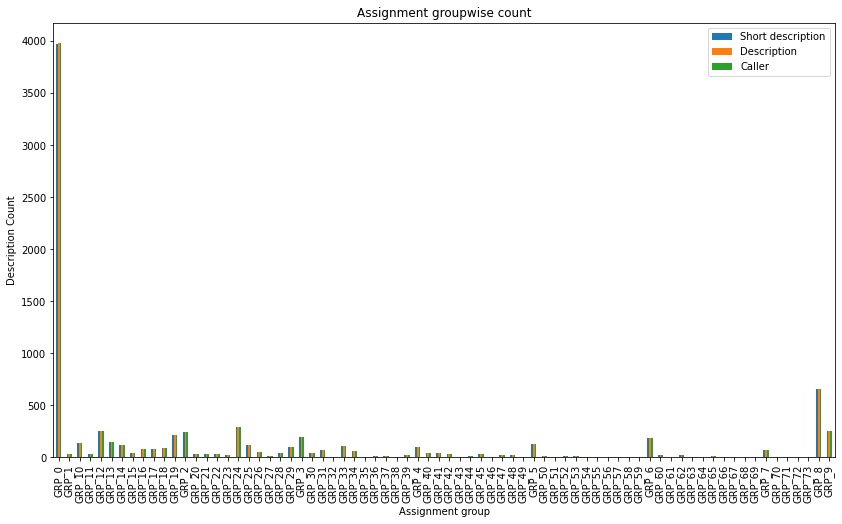

In [0]:
#Assignment group vs count of tickets
df_group_tickets = data.groupby(['Assignment group']).count()
df_group_tickets.info()
ax = data.groupby(['Assignment group']).count().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Assignment groupwise count")
ax.set_xlabel("Assignment group")
ax.set_ylabel("Description Count")

In [0]:
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


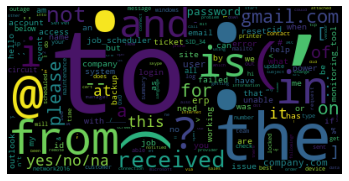

In [0]:
from nltk.tokenize import word_tokenize
desc = df['Description'].str.cat(sep=' ')
#print(desc)
#function to split text into word
tokens = word_tokenize(desc)
vocabulary = set(tokens)
#print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]


from wordcloud import WordCloud

wordcloud = WordCloud().generate_from_frequencies(frequency_dist)


#generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



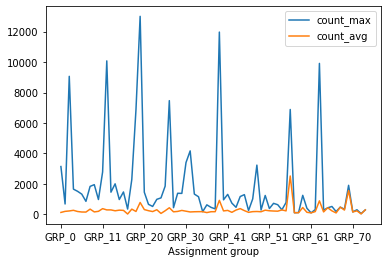

In [0]:
# Assignment Group vs Description Max length & Description Mean length
df['count_max'] = df.groupby(['Assignment group'], sort = False)['Desc_len'].transform(max)
df['count_avg'] = df.groupby(['Assignment group'], sort = False)['Desc_len'].transform('mean')
df_groupby = df

df_agg = df_groupby.drop_duplicates(['Assignment group','count_max','count_avg'])

df_agg

df_agg.plot(x="Assignment group", y=["count_max", "count_avg"])
plt.rcParams["figure.figsize"] = (20,10)

plt.show()

<B> <p> <font size="5" color="hex#1F618D" >G. Data Pre-Processing </font></p></B>
<BR>
<p><font size="4" color="hex#1F618D" >1. Remove the rows where “Description” were missing</font></p>
<p><font size="4" color="hex#1F618D"> 2. Preprocess description to remove unwanted symbols</font></p>   
<p><font size="4" color="hex#1F618D" >3. Transform to lowercase</font></p>
<p><font size="4" color="hex#1F618D" >4. Remove Punctuation</font></p>
<p><font size="4" color="hex#1F618D" >5. Remove stopwords</font></p>
<p><font size="4" color="hex#1F618D" >6. Remove commonwords</font></p>   
<p><font size="4" color="hex#1F618D" >7. Lexical Preprocessing</font></p>   


In [0]:
# Python program to Count Alphabets Digits and Special Characters in a String
 
alphabets = 1
digits = ""
special = ""

for i in range(len(desc)):
    if(desc[i].isalpha()):
        alphabets = alphabets + 1
    elif(desc[i].isdigit()):
        digits = digits + desc[i]
    else:
        special = special + desc[i]
        
#print (digits)

#print (special)
 

In [0]:
import re as regexp

#### Special characters to be treated as below 
# - . ( # & ) :  @ , / ? // _ [ ] * < ! > ; $ 

#Spchar = regexp.findall(r'^[\w\d]+$', desc)
# Find the email ids present in description
Semail = regexp.findall('\S+@\S+', desc)     
  
# Printing of List 
#print(Spchar) 
print(Semail)

['hmjdrvpb.komuaywn@gmail.com', 'eylqgodm.ybqkwiam@gmail.com', 'xyz@company.com', 'ugephfta.hrbqkvij@gmail.com', '[cid:image001.jpg@01d233aa.3f618be0]', 'dceoufyz.saufqkmd@gmail.com', 'kxsceyzo.naokumlb@gmail.com', 'yisohglr.uvteflgb@gmail.com', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'cdbaoqts.wqbsodni@gmail.com', 'cdbaoqts.wqbsodni@gmail.com<mailto:cdbaoqts.wqbsodni@gmail.com>', 'dlougnqw.jiuybxew@gmail.com', 'cnhkypxw.lafncksi@gmail.com', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'lkfzibrx.ljnabpgx@gmail.com', '[cid:image001.png@01d23357.fcbe58b0]', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'przndfbo.pldqbhtn@gmail.com', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'monitoring_tool@company.com', 'monitoring_tool@company.co

In [0]:
# Take data where description is not null 
# Take data for groups where more than  10 service request are there 
# df_groupby_final = df_final.groupby(['Assignment group']).count()
# df = df_groupby_final.query('Description>10')
# df.shape
# This indicates we have 49 groups with more than 10 service requests & 25 groups with less than 10 service requests

#df_final = data[~data['Short description'].isnull()]
df_final = data

df_groupby_final = df_final.groupby(['Assignment group']).count()
df_groupby = df_groupby_final.query('Description<10')

df_final.info()
df_groupby.info()

# Reset the index of dataframe
mod_df_groupby  = df_groupby.reset_index()

mod_df_groupby.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, GRP_32 to GRP_73
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Short description  25 non-null     int64
 1   Description        25 non-null     int64
 2   Caller             25 non-null     int64
dtypes: int64(3)
memory usage: 800.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  -

In [0]:
### Lets remove the rows with these 25 'assignement group' for which there are less than 10 service requests
deleted_count = 0
df_final['mark_delete'] = 0
for index1,row in df_final.iterrows(): 
    for index2,in_row in mod_df_groupby.iterrows(): 
        group1 = df_final.loc[index1,'Assignment group']
        group2 = mod_df_groupby.loc[index2,'Assignment group']        
        if (group1==group2) :
            deleted_count = deleted_count + 1 
            df_final.at[index1,'mark_delete'] = 1
            #print(group1)
            #print(df_final.loc[index1,'mark_delete'])
        else : 
            #print ("not match")
            pass 
                
### df_final where mark_delete = 1, are the rows to be removed     

In [0]:
####Use this to remove the groups for which we have less data
#df = df_final['mark_delete'== 0]
#df = df_final.query('mark_delete==0')

In [0]:
df = df_final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
 4   mark_delete        8500 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 332.2+ KB


In [0]:
## Remove email ids 
df['Description'] = df['Description'].str.replace("[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\\.[a-zA-Z0-9-.]+", "")
## Transform description to Lower Case
#df['Short description'] = df['Short description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
## Removal of stop words
#from nltk.corpus import stopwords
#stop = stopwords.words('english')
#df['Short description'] = df['Short description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#desc = df['Description'].str.cat(sep=' ')

#description = desc

def preprocess():
    
    df['Description'] = df['Description'].str.replace("(<br/>)", "")
    df['Description'] = df['Description'].str.replace("(", "")
    df['Description'] = df['Description'].str.replace(")", "")
    df['Description'] = df['Description'].str.replace("?", "") 
    df['Description'] = df['Description'].str.replace(":", "")
    df['Description'] = df['Description'].str.replace("-", "")
    df['Description'] = df['Description'].str.replace(".", "")
    df['Description'] = df['Description'].str.replace("[", "")
    df['Description'] = df['Description'].str.replace("]", "")
    df['Description'] = df['Description'].str.replace("@", "")
    df['Description'] = df['Description'].str.replace("#", "")
    df['Description'] = df['Description'].str.replace("/", "")
    df['Description'] = df['Description'].str.replace("<", "")
    df['Description'] = df['Description'].str.replace(">", "")
    df['Description'] = df['Description'].str.replace("%", "")
    df['Description'] = df['Description'].str.replace("mailto", "")
    df['Description'] = df['Description'].str.replace("_", "")
    df['Description'] = df['Description'].str.replace("=", "")
    df['Description'] = df['Description'].str.replace("'", "")
    df['Description'] = df['Description'].str.replace("$", "")
    df['Description'] = df['Description'].str.replace("!", "")
    df['Description'] = df['Description'].str.replace("|", "")
    df['Description'] = df['Description'].str.replace(",", "")

    df['Description'] = df['Description'].str.replace('(<a).*(>).*(</a>)', '')
    df['Description'] = df['Description'].str.replace('(&amp)', '')
    df['Description'] = df['Description'].str.replace('(&gt)', '')
    df['Description'] = df['Description'].str.replace('(&lt)', '')
    df['Description'] = df['Description'].str.replace('(\xa0)', ' ')  
    df['Description'] = df['Description'].str.replace('(\r)','')
    df['Description'] = df['Description'].str.replace('(\n)','')
    
    ## Remove punctuation
    df['Description'] = df['Description'].str.replace('[^\w\s]','') 
                                                  
    #return description[]

preprocess () 



In [0]:
df.head

<bound method NDFrame.head of                                       Short description  ... mark_delete
0                                           login issue  ...           0
1                                               outlook  ...           0
2                                    cant log in to vpn  ...           0
3                         unable to access hr_tool page  ...           0
4                                          skype error   ...           0
...                                                 ...  ...         ...
8495                  emails not coming in from zz mail  ...           0
8496                           telephony_software issue  ...           0
8497  vip2: windows password reset for tifpdchb pedx...  ...           0
8498                     machine nÃ£o estÃ¡ funcionando  ...           0
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           1

[8500 rows x 5 columns]>

<p><font size="4" color="hex#1F618D" >7. Lexical Preprocessing</font></p> 

In [0]:
###Language Detection
#import spacy
#from spacy_langdetect import LanguageDetector

!pip install langdetect
!pip install spacy-langdetect
!python -m spacy download en
!pip install pyenchant
!apt-get -qq install python-cartopy python3-enchant

import spacy
from spacy_langdetect import LanguageDetector

import enchant
d = enchant.Dict("en_US")

df["Desc_lang"] = ""
#nlp = spacy.load('en')
nlp = spacy.load("en_core_web_sm")

df["desc_eng_word"] = ""
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
for index,row in df.iterrows(): 
    #if index <= 10 :
        #print (df_final.loc[index1,'Description'])
        desc = df.loc[index,'Description']
        doc =nlp(str(desc))
        doc_lang = doc._.language
        df.at[index,'Desc_lang'] = doc_lang
        #print(str(desc))
        #print(doc_lang)
        english_words = []
        for word in doc:
            if str(word).isdigit():
                pass 
            else:
                if d.check(str(word)):
                    english_words.append(word)
        df.at[index,'desc_eng_word'] = str(english_words)
        #print (str(english_words))
        


     |████████████████████████████████| 983kB 3.2MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=c4fbfcea02b59ff8b17c4c03d7fb2ae5a148641f4e928157ec40680d49d8c9d7
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect
     |████████████████████████████████| 1.0MB 3.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993459 sha256=c6e472d8dd6eb8f3e2c1cfbed86783300052dea41b223e6330099788481dc722
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect
  Found existing installation: langdetect 1.0.8
    Uninstalling langdetect-1.0.8:
      Successfully uninstalled langdetect-1.0.8
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_cor

In [0]:
#### Lexical analysis of the english words ####################
#######Stemming#############################################
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        #stem_sentence.append(" ")
    return "".join(stem_sentence)

df["desc_with_stemmer"] = ""
for index,row in df.iterrows(): 
    #if index <= 10 :
        #print (df_final.loc[index1,'Description'])
        desc = df.loc[index,'desc_eng_word']
        doc =str(desc)
        doc_stemmed = stemSentence(doc)
        df.at[index,'desc_with_stemmer'] = str(doc_stemmed)
        #print(doc)
        #print(str(doc_stemmed))


In [0]:
#### Lexical analysis of the english words ####################
#######Lemmatizing#############################################
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


df["desc_with_stem_Lem"] = ""
for index,row in df.iterrows(): 
    #if index <= 10 :
        #print (df_final.loc[index1,'Description'])
        desc = df.loc[index,'desc_with_stemmer']
        #token_words=word_tokenize(desc)        
        token_words = desc.split(",")
        lemma_words = []
        for word in token_words:
            l_word = wordnet_lemmatizer.lemmatize(word)
            lemma_words.append(l_word)
        df.at[index,'desc_with_stem_Lem'] = str(lemma_words)
        #print(desc)
        #print(lemma_words)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
# DF TO EXCEL - for Jupyter
#from pandas import ExcelWriter

#writer = ExcelWriter('short_desc_corrected_all.xlsx')
#df.to_excel(writer,'Sheet0')
#writer.save()

#from google.colab import files
#files.download('short_desc_corrected_all.xlsx')


#from google.colab import files

#with open('example.xlsx', 'w') as f:
#  f.write(df)

#files.download('example.xlsx')

df.to_excel('short_desc_corrected_all.xlsx')
from google.colab import files
with open('short_desc_corrected_all.xlsx', 'w') as f:
  f.ExcelWriter('short_desc_corrected_all.xlsx')


# DF TO CSV
#yourdf.to_csv('PythonExport.csv', sep=',')



AttributeError: ignored

<B> <p> <font size="5" color="hex#1F618D" >Feature Engineering </font></p></B>
<BR>
<p><font size="4" color="hex#1F618D" >a. Count Vectors.</font></p>
<p><font size="4" color="hex#1F618D" >b. TD-IDF</font></p>    
<p><font size="4" color="hex#1F618D"> c. Word Embedding </font></p> 
<p><font size="4" color="hex#1F618D"> d. Text / NLP based features </font></p>


In [0]:
#Initiallization
group, description = [], []
# create a dataframe using texts and lables
trainDF = pd.DataFrame()
#trainDF['Group'] = group
#trainDF['Description'] = description
trainDF['Group']=df['Assignment group']
trainDF['Description'] = df['desc_with_stem_Lem']
#trainDF['Description'] = df['lem_desc']
trainDF.head

<bound method NDFrame.head of        Group                                        Description
0      GRP_0  ['[verifi', 'user', '', 'manag', 'the', 'user'...
1      GRP_0  ['[receiv', 'from', 'hello', 'meet', 'etc', 'a...
2      GRP_0  ['[receiv', 'from', 'can', 'not', 'log', 'on',...
3      GRP_0                ['[unabl', 'to', 'access', 'page]']
4      GRP_0                                        ['[error]']
...      ...                                                ...
8495  GRP_29  ['[receiv', 'from', 'good', 'am', 'not', 'rece...
8496   GRP_0                                         ['[issu]']
8497   GRP_0           ['[window', 'password', 'reset', 'for]']
8498  GRP_62  ['[i', 'am', 'unabl', 'to', 'access', 'the', '...
8499  GRP_49                                           ['[an]']

[8500 rows x 2 columns]>

In [0]:
# split the dataset into training and validation datasets # Split Train & Test Dataset
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['Description'], trainDF['Group'],test_size=test_size, random_state=seed)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)


<p><font size="4" color="hex#1F618D" >a. Count Vectors.</font></p>


In [0]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['Description'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

<p><font size="4" color="hex#1F618D" >b. TD-IDF</font></p>  

In [0]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['Description'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['Description'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['Description'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:524: UserWarning:

The parameter 'token_pattern' will not be used since 'analyzer' != 'word'



<B> <p> <font size="5" color="hex#1F618D" >Model Building </font></p></B>
<BR>
<p><font size="4" color="hex#1F618D" >a. Naive Bayes Classifier</font></p>
<p><font size="4" color="hex#1F618D" >b. Linear Classifier</font></p>    
<p><font size="4" color="hex#1F618D"> c. Support Vector Machine </font></p> 
<p><font size="4" color="hex#1F618D" >d. Gradient Boosting</font></p>
<p><font size="4" color="hex#1F618D"> e. Deep Learning</font></p>


### Generic function to use various model

In [0]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)


<p><font size="4" color="hex#1F618D" >a. Naive Bayes Classifier</font></p> 

In [0]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)


NB, Count Vectors:  0.49529411764705883
NB, WordLevel TF-IDF:  0.4745098039215686
NB, N-Gram Vectors:  0.4796078431372549


<p><font size="4" color="hex#1F618D" >b. Linear Classifier</font></p> 

In [0]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR, Count Vectors:  0.5113725490196078
LR, WordLevel TF-IDF:  0.5007843137254901
LR, N-Gram Vectors:  0.4807843137254902


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<p><font size="4" color="hex#1F618D" >c. Support Vector Machines</font></p> 

In [0]:
# SVM Classifier on Count Vectors
accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print ("SVM, Count Vectors: ", accuracy)

# SVM on WordLevel TF-IDF Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, WordLevel TF-IDF: ", accuracy)

# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracy)
# Linear different kernels, Gamma, grid-search

SVM, Count Vectors:  0.47843137254901963
SVM, WordLevel TF-IDF:  0.5078431372549019
SVM, N-Gram Vectors:  0.48274509803921567


<p><font size="4" color="hex#1F618D" >d. Gradient Boosting</font></p> 

In [0]:
#!pip install xgboost

from xgboost import XGBClassifier

# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(XGBClassifier(booster='gbtree', objective='multi:softprob', random_state=42, eval_metric="auc", num_class=60), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print("Xgb, CharLevel Vectors: ", accuracy)


Xgb, Count Vectors:  0.49254901960784314
Xgb, WordLevel TF-IDF:  0.4992156862745098
Xgb, CharLevel Vectors:  0.5003921568627451


<p><font size="4" color="hex#1F618D" >e. Deep Learning </font></p> 

In [0]:
#!!pip uninstall tensorflow
#!pip install tensorflow==2.0.0
#!pip install tensorflow==1.2.0 --ignore-installed


In [1]:
from google.colab import drive

drive.mount('/content/drive')

import numpy as np
import pandas as pd

df = pd.read_excel('drive/My Drive/AIML/desc_corrected_all.xlsx')

#df = pd.read_excel('capstne_ticket_data.xlsx')

#data_path = "capstne_ticket_data.xlsx"
#data = pd.read_excel(data_path)
#data_sel = data.head(10000)                   

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import tensorflow as tf
#tf._version_

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, Conv1D, MaxPooling1D 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.initializers import Constant

In [0]:
import os
#Extract Glove embedding zip file

os.chdir('drive/My Drive/AIML/')

In [4]:

max_features = 20000

#df["Short description"] = df["Short description"].astype(str)
#df["desc_with_stem_Lem"] = df["desc_eng_word"].astype(str)
df["Description"] = df["Description"].astype(str)

tokenizer=Tokenizer(num_words = max_features)

#tokenizer.fit_on_texts(df["Short description"])
#tokenizer.fit_on_texts(df["desc_eng_word"])
tokenizer.fit_on_texts(df["Description"])

#X = tokenizer.texts_to_sequences(PROCESSED)
#X = tokenizer.texts_to_sequences(df["Short description"])
#X = tokenizer.texts_to_sequences(df["desc_eng_word"])
X = tokenizer.texts_to_sequences(df["Description"])

print(X[10])

# summarize what was learned
#print(tokenizer.word_counts)
#print(tokenizer.document_count)
#print(tokenizer.word_index)
#print(tokenizer.word_docs)

print(dict(list(tokenizer.word_index.items())[0:10]))

X = pad_sequences(X, maxlen = 300)
#print("Number of Samples:", len(X))
#print(X.shape)

[219, 154, 431, 212, 15, 374, 411]
{'from': 1, 'received': 2, 'please': 3, 'yesnona': 4, 'password': 5, 'user': 6, 'erp': 7, 'job': 8, 'jobscheduler': 9, 'failed': 10}


In [5]:
print(df)

from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

y = pd.DataFrame(enc.fit_transform(df[['Assignment group']]).toarray())

y.head()

      Unnamed: 0  ...                                 desc_with_stem_Lem
0              0  ...  ['[verifi', 'user', '', 'manag', 'name', 'chec...
1              1  ...  ['[receiv', 'from', 'hello', 'team', 'meet', '...
2              2  ...  ['[receiv', 'from', 'hi', 'can', 'not', 'log',...
3              3  ...                      ['[unabl', 'access', 'page]']
4              4  ...                                        ['[error]']
...          ...  ...                                                ...
8494        8495  ...  ['[receiv', 'from', 'good', 'afternoon', 'rece...
8495        8496  ...                                         ['[issu]']
8496        8497  ...                  ['[window', 'password', 'reset]']
8497        8498  ...  ['[unabl', 'access', 'machin', 'util', 'finish...
8498        8499  ...                                             ['[]']

[8499 rows x 13 columns]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.01)

batch_size = 32
epochs = 100
drop_ratio = 0.5

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [7]:
df.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,Desc_word_count,Desc_len,count_max,count_avg,Desc_lang,desc_eng_word,desc_with_stemmer,desc_with_stem_Lem
0,0,login issue,verified user detailsemployee manager name ch...,spxjnwir pjlcoqds,GRP_0,33,206,3141,129.705912,"{'language': 'en', 'score': 0.9999956371533831}","[verified, user, , manager, name, checked, us...","[verifi,user,,manag,name,check,user,name,ad,re...","['[verifi', 'user', '', 'manag', 'name', 'chec..."
1,1,outlook,received from hello team meetingsskype meeting...,hmjdrvpb komuaywn,GRP_0,25,194,3141,129.705912,"{'language': 'en', 'score': 0.9999963202922426}","[received, from, hello, team, meetings, etc, a...","[receiv,from,hello,team,meet,etc,appear,outloo...","['[receiv', 'from', 'hello', 'team', 'meet', '..."
2,2,cant log in to vpn,received from hi cannot log vpn best,eylqgodm ybqkwiam,GRP_0,11,87,3141,129.705912,"{'language': 'en', 'score': 0.8571406369171888}","[received, from, hi, can, not, log, best]","[receiv,from,hi,can,not,log,best]","['[receiv', 'from', 'hi', 'can', 'not', 'log',..."
3,3,unable to access hr_tool page,unable access hrtool page,xbkucsvz gcpydteq,GRP_0,5,29,3141,129.705912,"{'language': 'fr', 'score': 0.7142808800412834}","[unable, access, page]","[unabl,access,page]","['[unabl', 'access', 'page]']"
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,2,12,3141,129.705912,"{'language': 'no', 'score': 0.9999935163447529}",[error],[error],['[error]']


In [9]:
# Read from loaded model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json
import numpy
import os


# load json and create model
json_file = open('Best_Model_LSTM_Glove_Description.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Best_Model_LSTM_Glove_Description.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_train, y_train, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 78.50%


# Important Note : Below Code Are not used for now

In [0]:
from sklearn.metrics import classification_report

for i in loaded_model.metrics_names:
  print(i)


loss
accuracy


In [0]:
import nltk
import sklearn.metrics
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rounded_predictions = loaded_model.predict_classes(x_train, batch_size=128, verbose=0)
rounded_predictions[1]
# 2
import numpy as np
rounded_labels=np.argmax(y_train, axis=1)
rounded_labels[1]
# 2
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
np.set_printoptions(threshold=np.inf)

In [0]:
from IPython.display import display, HTML

display(cm)



array([[3810,    0,    0,    3,   15,   15,    0,    0,   18,    3,    3,
           5,   18,    0,    0,    0,    0,    3,    9,    1,    0,    0,
           1,   14,    0,    0,    0,    7,    0,    0,    0,    0,    0,
           0,    4,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    9,    0,    0,    0,    0,    3,    0],
       [   2,    3,    1,    0,    8,    0,    6,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    6,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    5,    0]